In [3]:
import os

import analysis_plotting_helper_functions_c3v3 as helper
import session_processing_helper_c5v2 as processing_helper
import analysis_utils as utils
import utils_c5v2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data_dir = '/Users/rebekahzhang/data/behavior_data'
exp = "exp2"
cohort = "cohort_7"
data_folder = os.path.join(data_dir, exp, cohort)
figure_folder = os.path.join(data_dir, exp, f'{cohort}_figures')
print(data_folder)
print(figure_folder)

/Users/rebekahzhang/data/behavior_data/exp2/cohort_7
/Users/rebekahzhang/data/behavior_data/exp2/cohort_7_figures


In [5]:
# two_colors = plt.cm.viridis(np.linspace(0, 1, 2))
two_colors = ["#ffb400", "#9080ff"]
custom_palette = {'s': two_colors[0], 'l': two_colors[1]}

In [6]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00"]

In [9]:
def correct_sessions_training(data_folder, save_log=True):
    _, sessions_training = processing_helper.generate_session_logs(data_folder, save_logs=False)
    session_info_list = []
    for _, session_info in sessions_training.iterrows():
        events_processed = pd.read_csv(utils_c5v2.generate_events_processed_path(data_folder, session_info), low_memory=False)
        session_basics = processing_helper.get_session_basics(events_processed)
        session_basics['dir'] = session_info['dir']
        session_info_list.append(session_basics)
    sessions_info = pd.DataFrame(session_info_list)
    corrected_sessions_training = pd.merge(sessions_training, sessions_info, on="dir")
    corrected_sessions_training = corrected_sessions_training.drop(columns=['index', 'total_reward', 'total_trial', 'total_reward'])
    corrected_sessions_training = corrected_sessions_training.groupby('mouse', group_keys=False).apply(processing_helper.assign_session_numbers)
    if save_log:
        utils_c5v2.save_as_csv(df=corrected_sessions_training, folder=data_folder, filename='sessions_training.csv')
    return corrected_sessions_training

In [10]:
sessions_training = correct_sessions_training(data_folder)

555 sessions in total


# Session based plotting

### load session log

In [9]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training.csv'))

In [11]:
sessions_training

,date,time,mouse,exp,training,rig,trainer,record,avg_tw,ending_code,dir,group,session,num_blocks,num_trials,rewards,session_time
0,2024-11-15,14-39-33,RZ057,2,regular,rig2,Rebekah,False,5.12,manual,2024-11-15_14-39-33_RZ057,l,0,1,114,285.0,5079.83
1,2024-11-15,14-39-36,RZ058,2,regular,rig3,Rebekah,False,7.15,manual,2024-11-15_14-39-36_RZ058,l,0,1,188,485.0,5049.76
2,2024-11-15,14-39-56,RZ061,2,regular,rig5,Rebekah,False,2.81,reward,2024-11-15_14-39-56_RZ061,s,0,1,374,700.0,2731.96
3,2024-11-15,14-39-58,RZ059,2,regular,rig4,Rebekah,False,7.55,reward,2024-11-15_14-39-58_RZ059,l,0,1,223,700.0,4463.84
4,2024-11-15,14-40-08,RZ063,2,regular,rig7,Rebekah,False,0.91,reward,2024-11-15_14-40-08_RZ063,s,0,1,735,700.0,4134.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2025-03-17,13-13-38,RZ059,2,regular,rig1,Rebekah,True,8.47,miss,2025-03-17_13-13-38_RZ059,l,50,1,284,875.0,4622.56
551,2025-03-18,11-12-43,RZ059,2,regular,rig1,Rebekah,True,2.55,reward,2025-03-18_11-12-43_RZ059,l,51,1,434,900.0,5031.07
552,2025-03-19,12-19-18,RZ059,2,regular,rig1,Rebekah,True,5.41,reward,2025-03-19_12-19-18_RZ059,l,52,1,272,900.0,3782.92
553,2025-03-20,13-48-44,RZ059,2,regular,rig1,Rebekah,True,5.55,reward,2025-03-20_13-48-44_RZ059,l,53,1,316,900.0,4442.58


make mouse list

In [12]:
# mouse_list = utils_c5v2.generate_mouse_list(sessions_training)
# mouse_list = ['RZ047','RZ049','RZ050','RZ051','RZ052','RZ053','RZ054','RZ055','RZ056']
mouse_list = ['RZ057', 'RZ058', 'RZ059', 'RZ061', 'RZ062', 'RZ063', 'RZ064', 'RZ065', 'RZ067', 'RZ068', 'RZ069', 'RZ070', 'RZ072']
print(mouse_list)

['RZ057', 'RZ058', 'RZ059', 'RZ061', 'RZ062', 'RZ063', 'RZ064', 'RZ065', 'RZ067', 'RZ068', 'RZ069', 'RZ070', 'RZ072']


In [13]:
# cohort_group = {"s": ['RZ034', 'RZ036'], 
#           "l": ['RZ037', 'RZ038', 'RZ039']}
# cohort_group = {"s": ['RZ047', 'RZ050', 'RZ051'], 
#           "l": ['RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056']}
cohort_group = {"s": ['RZ061', 'RZ062', 'RZ063', 'RZ064', 'RZ069', 'RZ070', 'RZ072'], 
          "l": ['RZ057', 'RZ058', 'RZ059', 'RZ065', 'RZ067', 'RZ068']}

In [14]:
mouse_list

['RZ057',
 'RZ058',
 'RZ059',
 'RZ061',
 'RZ062',
 'RZ063',
 'RZ064',
 'RZ065',
 'RZ067',
 'RZ068',
 'RZ069',
 'RZ070',
 'RZ072']

### Plotting functions
should be moved to helper

In [15]:
def plot_each_mouse_per_line(data_df, column_name, plot_name, title, x_label, y_label, 
                             figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.session, session_mouse[column_name], color=colors[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [16]:
def plot_overdays_colored_by_group(data_df, column_name, plot_name, title, x_label, y_label, 
                                   figure_folder=figure_folder, color_palette=custom_palette):
    fig = plt.figure()
    sns.lineplot(x="session",
                 y=column_name,
                 hue="group",
                 data=data_df,
                 palette=color_palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.ylim(1,4)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

# Plot type of trials per session

### generate trial type df for plotting
Calculate proportions of trials types and generate trial type df

In [21]:
sessions_training[sessions_training.mouse=='RZ070']

,date,time,mouse,exp,training,rig,trainer,record,avg_tw,ending_code,dir,group,session,num_blocks,num_trials,rewards,session_time,miss_trials,good_trials
19,2024-11-18,15-58-22,RZ070,2,regular,rig4,Rebekah,False,1.48,reward,2024-11-18_15-58-22_RZ070,s,0,1,446,700.0,2757.48,0.0,207.0
38,2024-11-21,15-32-21,RZ070,2,regular,rig3,Rebekah,False,4.26,reward,2024-11-21_15-32-21_RZ070,s,1,1,293,700.0,2487.12,2.0,232.0
50,2024-11-22,14-40-29,RZ070,2,regular,rig3,Rebekah,False,10.74,miss,2024-11-22_14-40-29_RZ070,s,2,1,251,615.0,3472.17,19.0,173.0
62,2024-11-25,15-02-17,RZ070,2,regular,rig3,Rebekah,False,3.52,reward,2024-11-25_15-02-17_RZ070,s,3,1,316,700.0,2512.58,0.0,208.0
76,2024-11-26,12-30-43,RZ070,2,regular,rig2,Rebekah,False,5.89,miss,2024-11-26_12-30-43_RZ070,s,4,1,246,610.0,2204.54,4.0,202.0
89,2024-11-27,13-02-27,RZ070,2,regular,rig6,Rebekah,False,1.54,reward,2024-11-27_13-02-27_RZ070,s,5,1,429,700.0,2595.51,0.0,235.0
102,2024-12-02,13-38-56,RZ070,2,regular,rig2,Rebekah,False,5.26,miss,2024-12-02_13-38-56_RZ070,s,6,1,260,620.0,2169.81,2.0,213.0
115,2024-12-03,12-29-15,RZ070,2,regular,rig6,Rebekah,False,6.05,miss,2024-12-03_12-29-15_RZ070,s,7,1,310,630.0,2876.40,6.0,262.0
128,2024-12-04,11-28-42,RZ070,2,regular,rig2,Rebekah,False,5.19,miss,2024-12-04_11-28-42_RZ070,s,8,1,286,625.0,2396.34,6.0,220.0
140,2024-12-06,13-33-59,RZ070,2,regular,rig6,Rebekah,False,2.03,reward,2024-12-06_13-33-59_RZ070,s,9,1,357,700.0,2275.23,0.0,254.0


In [18]:
def generate_trial_type_df(training_session_log):
    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        session_performance = helper.get_session_performance(all_trials)
        training_session_log.loc[training_session_log.dir == session_info['dir'], 
                                    ['miss_trials', 'good_trials']] = session_performance
    trial_type_df = training_session_log[['mouse', 'group', 'session', 'num_trials', 
                                            'miss_trials', 'good_trials']].copy()
    trial_type_df['p_miss'] = trial_type_df.miss_trials/trial_type_df.num_trials
    trial_type_df['p_good'] = trial_type_df.good_trials/trial_type_df.num_trials
    trial_type_df['p_accident'] = 1 - trial_type_df.p_good - trial_type_df.p_miss 
    return trial_type_df

########## currently debugging this portion ###############

In [19]:
trial_type_df = generate_trial_type_df(sessions_training)

### trial type combined plot

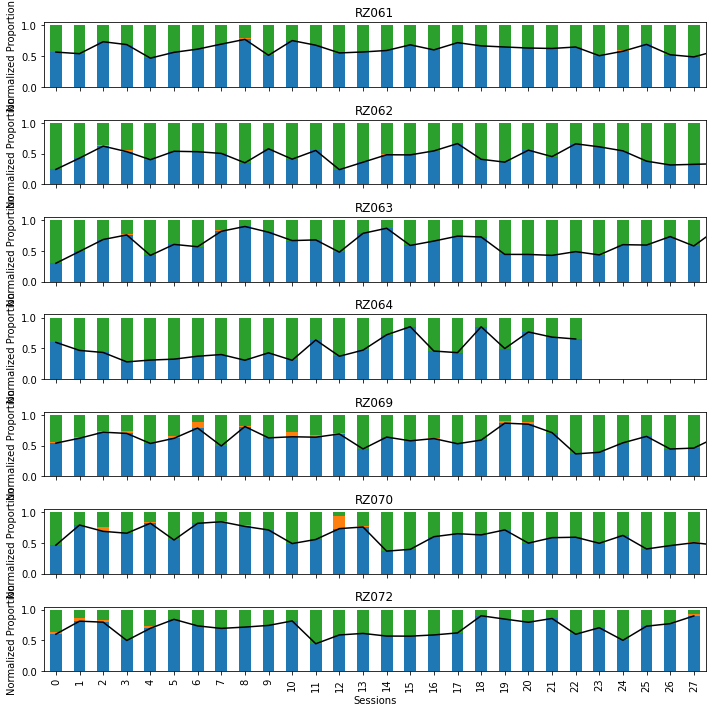

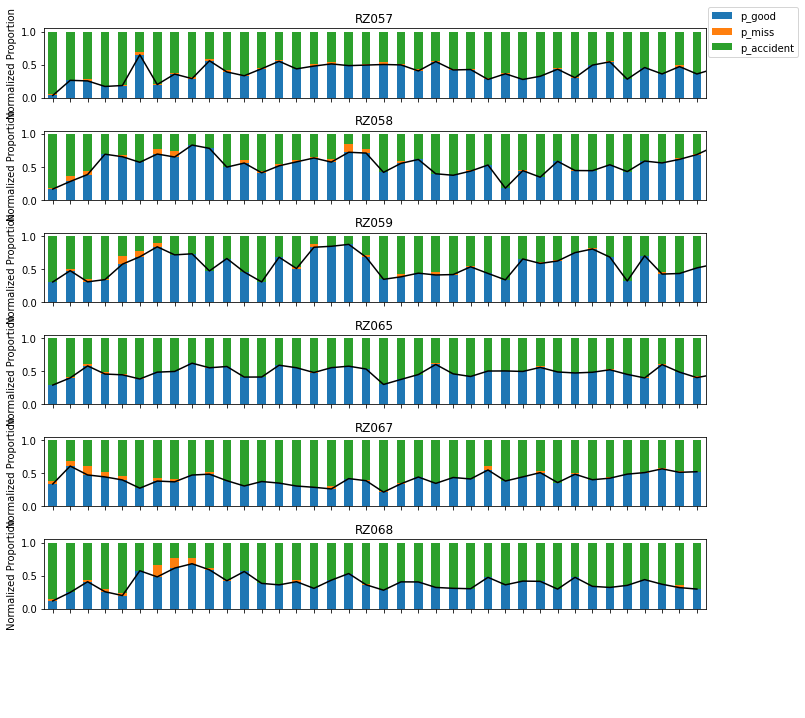

In [20]:
for group, mice in cohort_group.items():
  fig, axs = plt.subplots(7, 1, figsize=(10, 10), sharex=True)

  for i, mouse in enumerate(mice):
    session_mouse = trial_type_df.loc[(trial_type_df.mouse == mouse) & (trial_type_df.group == group)]
    to_plot = session_mouse.loc[:, ['session', 'p_good', 'p_miss', 'p_accident']]
    ax = axs.flat[i]
    to_plot.plot.bar(x='session', stacked=True, ax=ax, legend=None)
    ax.set_title(mouse)
    ax.set_xlabel('Sessions')
    ax.set_ylabel('Normalized Proportion')
    ax.plot(to_plot.session, to_plot.p_good, color='k', linewidth=1.5)
  
  if group == "l":
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    axs.flat[-1].axis('off')
  plt.tight_layout()
  plt.savefig(f'{figure_folder}/engagement_plots_{group}.png', bbox_inches='tight')

### percentage good trials

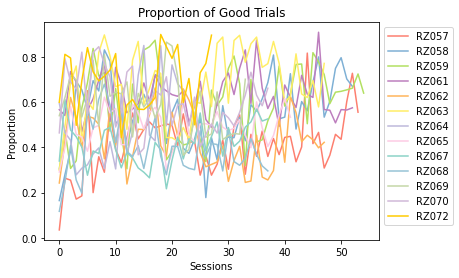

In [22]:
# plot the proportion of good trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_good', 
                         plot_name="%_good_trials", 
                         title='Proportion of Good Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

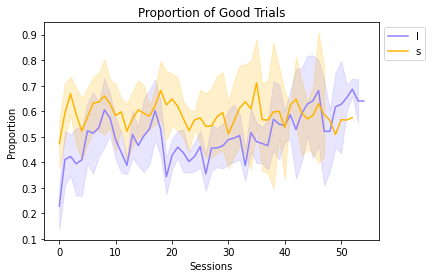

In [23]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_good", 
                               plot_name='%_good_trials_by_group', 
                               title='Proportion of Good Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent missed trials

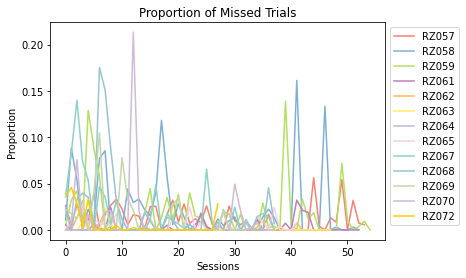

In [24]:
# plot the proportion of miss trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_miss', 
                         plot_name="%_miss_trials",
                         title='Proportion of Missed Trials', 
                         x_label='Sessions', 
                         y_label='Proportion')

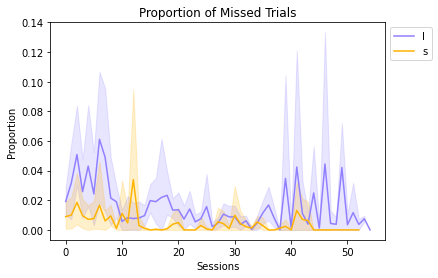

In [25]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_miss", 
                               plot_name='%_miss_trials_by_group', 
                               title='Proportion of Missed Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent accident trials

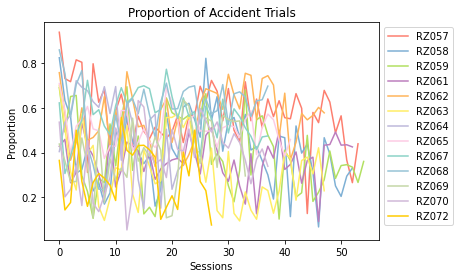

In [26]:
# plot the proportion of accident trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_accident', 
                         plot_name="%_accident_trials", 
                         title='Proportion of Accident Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

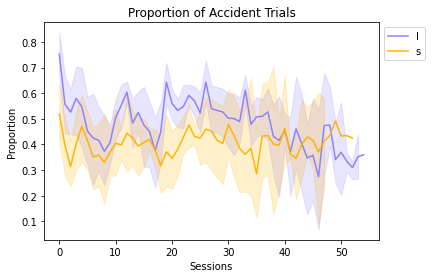

In [27]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_accident", 
                               plot_name='%_accident_trials_by_group', 
                               title='Proportion of Accident Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

# Plot rewards per session

### add info to training session log for plotting

In [28]:
def generate_reward_df(sessions):

    reward_df = sessions[['mouse', 'group', 'session', 'num_trials', 
                                            'rewards', 'session_time']].copy()
    reward_df['reward_rate'] = reward_df.rewards/reward_df.session_time
    reward_df['reward_per_trial'] = reward_df.rewards/reward_df.num_trials
    reward_df['num_trials_rewarded'] = reward_df.rewards/5
    reward_df['%_trials_rewarded'] = reward_df.num_trials_rewarded/reward_df.num_trials

    return reward_df

In [29]:
rewards_df = generate_reward_df(sessions_training)

### plot % rewarded trials

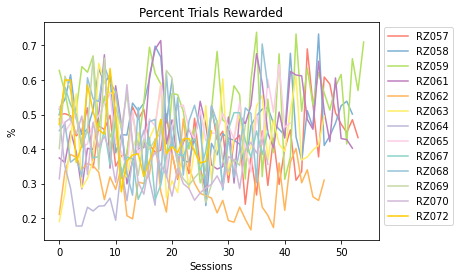

In [30]:
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='%_trials_rewarded', 
                         plot_name="%_trials_rewarded",
                         title='Percent Trials Rewarded', 
                         x_label='Sessions', 
                         y_label='%')

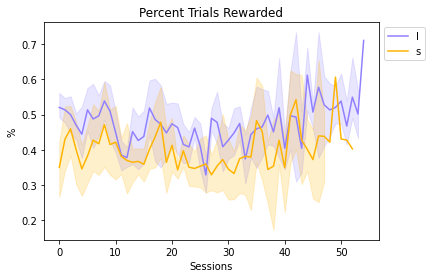

In [31]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="%_trials_rewarded", 
                               plot_name='%_trials_rewarded_by_group', 
                               title='Percent Trials Rewarded', 
                               x_label='Sessions', 
                               y_label='%')

### Plot reward rate

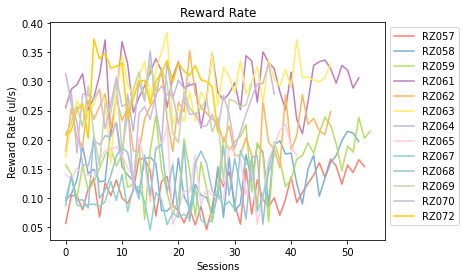

In [32]:
# plot the reward rate
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='reward_rate', 
                         plot_name="reward_rate",
                         title='Reward Rate', 
                         x_label='Sessions', 
                         y_label='Reward Rate (ul/s)')

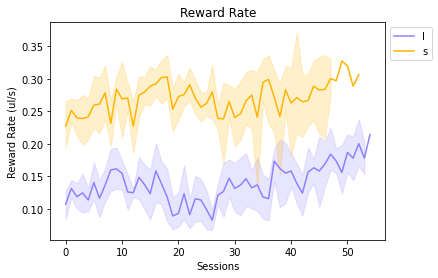

In [33]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="reward_rate", 
                               plot_name='reward_rate_by_group', 
                               title='Reward Rate', 
                               x_label='Sessions', 
                               y_label='Reward Rate (ul/s)')

### Plot session length

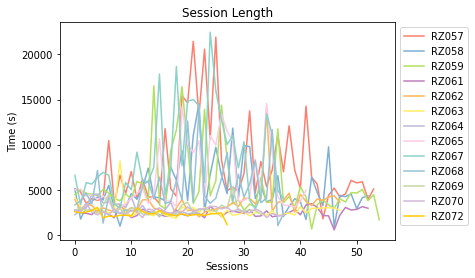

In [34]:
# plot the session length
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='session_time', 
                         plot_name="session_length", 
                         title='Session Length',
                         x_label='Sessions', 
                         y_label='Time (s)')

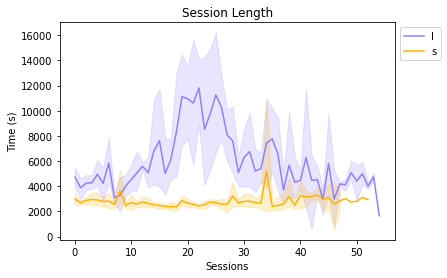

In [35]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="session_time", 
                               plot_name='session_length_by_group', 
                               title='Session Length', 
                               x_label='Sessions', 
                               y_label='Time (s)')

### plot num trials completed

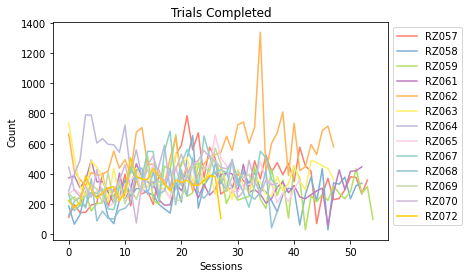

In [36]:
# plot the number of trials completed
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='num_trials', 
                         plot_name="num_trials", 
                         title='Trials Completed',
                         x_label='Sessions', 
                         y_label='Count')

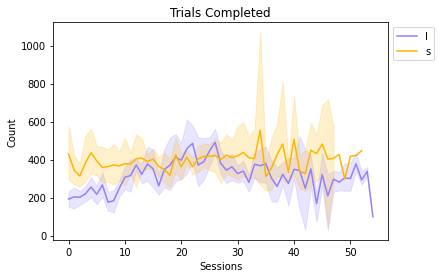

In [37]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="num_trials", 
                               plot_name='num_trials_by_group', 
                               title='Trials Completed', 
                               x_label='Sessions', 
                               y_label='Count')

# Plot background behavior

### generate mistake df for plotting

In [38]:
def get_session_mistakes(all_trials):
    all_trials['bg_repeats'] -= 1
    num_bg_repeats_mean = all_trials.bg_repeats.mean()
    num_bg_repeats_med = all_trials.bg_repeats.median()
    num_bg_repeats_std = all_trials.bg_repeats.std()
    num_bg_repeats_rate_mean = num_bg_repeats_mean/all_trials.bg_length.mean()
    return [num_bg_repeats_mean, num_bg_repeats_med, num_bg_repeats_std, num_bg_repeats_rate_mean]

In [39]:
def generate_mistake_df(training_session_log):
    mistake_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_mistakes = get_session_mistakes(all_trials)
        mistake_df.loc[mistake_df.dir == session_info['dir'], 
                                ['num_bg_repeats_mean', 'num_bg_repeats_med', 
                                 'num_bg_repeats_std', 'num_bg_repeats_rate_mean']] = session_mistakes
    return mistake_df

In [40]:
mistakes_df = generate_mistake_df(sessions_training)

### plot number of mistakes per trial

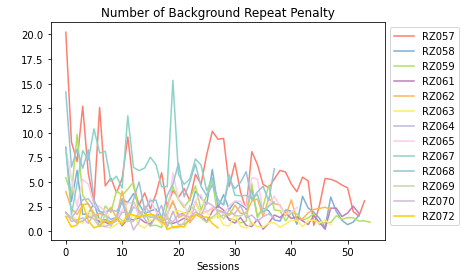

In [41]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_mean', 
                         plot_name="num_bg_repeats_mean", 
                         title='Number of Background Repeat Penalty',
                         x_label='Sessions', 
                         y_label=' ')

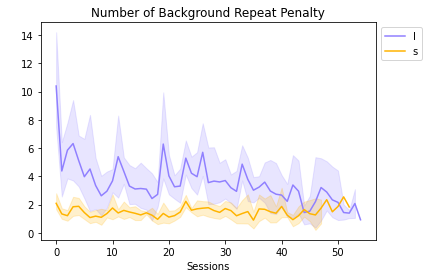

In [42]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_mean", 
                               plot_name='num_bg_repeats_mean_by_group', 
                               title='Number of Background Repeat Penalty', 
                               x_label='Sessions', 
                               y_label=' ')

### plot mistake rate

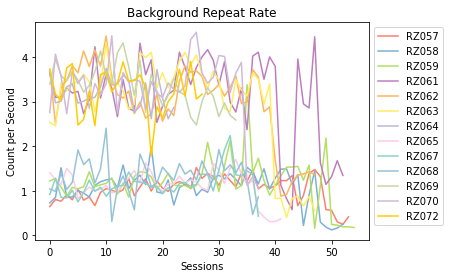

In [43]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_rate_mean', 
                         plot_name="num_bg_repeats_rate_mean", 
                         title='Background Repeat Rate',
                         x_label='Sessions', 
                         y_label='Count per Second')

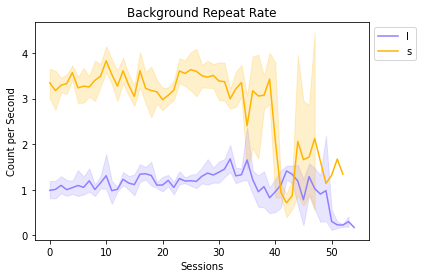

In [44]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_rate_mean", 
                               plot_name='num_bg_repeats_rate_mean_by_group', 
                               title='Background Repeat Rate', 
                               x_label='Sessions', 
                               y_label='Count per Second')

# Plot time wait behavior

### generate wait df for plotting

In [45]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [46]:
wait_df = generate_wait_df(sessions_training)

### plot time watied

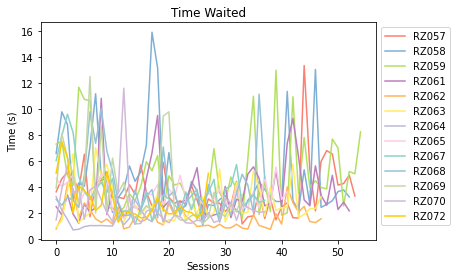

In [47]:
# plot the time waited over days. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean', 
                         plot_name="tw_mean", 
                         title='Time Waited',
                         x_label='Sessions', 
                         y_label='Time (s)')

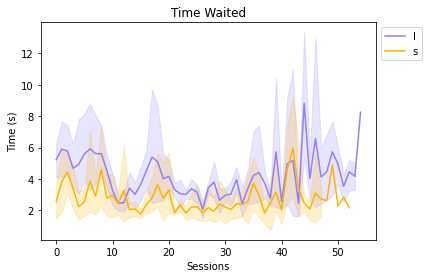

In [48]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean", 
                               plot_name='tw_mean_by_group', 
                               title='Time Waited', 
                               x_label='Sessions', 
                               y_label='Time (s)')

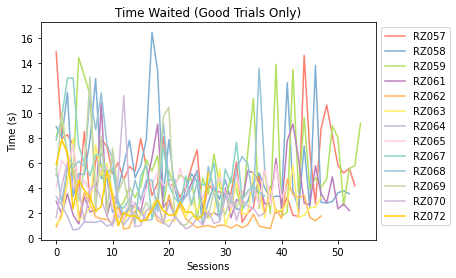

In [49]:
# plot the time waited over days good trials only. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean_g', 
                         plot_name="tw_mean_g", 
                         title='Time Waited (Good Trials Only)',
                         x_label='Sessions', 
                         y_label='Time (s)')

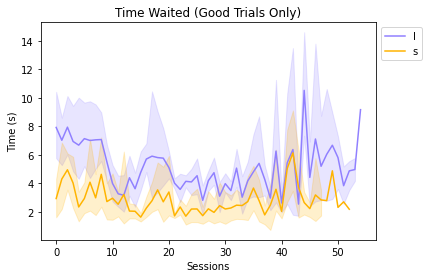

In [50]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean_g", 
                               plot_name='tw_mean_g_by_group', 
                               title='Time Waited (Good Trials Only)', 
                               x_label='Sessions', 
                               y_label='Time (s)')

## some stats

all sessions tw difference

In [51]:
sessions_training

,date,time,mouse,exp,training,rig,trainer,record,avg_tw,ending_code,dir,group,session,num_blocks,num_trials,rewards,session_time,miss_trials,good_trials
0,2024-11-15,14-39-33,RZ057,2,regular,rig2,Rebekah,False,5.12,manual,2024-11-15_14-39-33_RZ057,l,0,1,114,285.0,5079.83,3.0,4.0
1,2024-11-15,14-39-36,RZ058,2,regular,rig3,Rebekah,False,7.15,manual,2024-11-15_14-39-36_RZ058,l,0,1,188,485.0,5049.76,2.0,31.0
2,2024-11-15,14-39-56,RZ061,2,regular,rig5,Rebekah,False,2.81,reward,2024-11-15_14-39-56_RZ061,s,0,1,374,700.0,2731.96,2.0,212.0
3,2024-11-15,14-39-58,RZ059,2,regular,rig4,Rebekah,False,7.55,reward,2024-11-15_14-39-58_RZ059,l,0,1,223,700.0,4463.84,1.0,68.0
4,2024-11-15,14-40-08,RZ063,2,regular,rig7,Rebekah,False,0.91,reward,2024-11-15_14-40-08_RZ063,s,0,1,735,700.0,4134.52,0.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2025-03-17,13-13-38,RZ059,2,regular,rig1,Rebekah,True,8.47,miss,2025-03-17_13-13-38_RZ059,l,50,1,284,875.0,4622.56,3.0,184.0
551,2025-03-18,11-12-43,RZ059,2,regular,rig1,Rebekah,True,2.55,reward,2025-03-18_11-12-43_RZ059,l,51,1,434,900.0,5031.07,0.0,284.0
552,2025-03-19,12-19-18,RZ059,2,regular,rig1,Rebekah,True,5.41,reward,2025-03-19_12-19-18_RZ059,l,52,1,272,900.0,3782.92,1.0,180.0
553,2025-03-20,13-48-44,RZ059,2,regular,rig1,Rebekah,True,5.55,reward,2025-03-20_13-48-44_RZ059,l,53,1,316,900.0,4442.58,3.0,229.0


In [52]:
short = wait_df[wait_df['group']=='s']
long = wait_df[wait_df['group']=='l']

print(short.tw_mean.mean())
print(long.tw_mean.mean())

#perform independent two sample t-test
stats.ttest_ind(short['tw_mean'], long['tw_mean'])

2.767478800007958
4.1337129471067


Ttest_indResult(statistic=-7.3372498139383096, pvalue=7.818281482684417e-13)

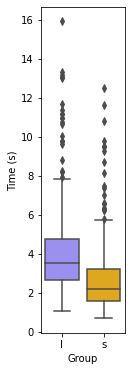

In [53]:
plt.figure(figsize=(1.5, 6))
sns.boxplot(data=wait_df, x="group", y="tw_mean", palette=custom_palette)
plt.ylabel("Time (s)")
plt.xlabel("Group")
plt.savefig(f'{figure_folder}/{"tw_box"}.png', bbox_inches='tight')

by days sessions tw difference

In [54]:
def generate_p_val_df(wait_df, group_col_name):
    result_list = []
    for num, data in wait_df.groupby(group_col_name):
        short = data[data['group']=='s']
        long = data[data['group']=='l']
        s_tw = short.tw_mean.mean()
        l_tw = long.tw_mean.mean()

        # Perform t-test
        ttest = stats.ttest_ind(short['tw_mean'], long['tw_mean'])
        p_val_t = ttest[1]

        # Perform Mann-Whitney U test
        u_test = stats.mannwhitneyu(short['tw_mean'], long['tw_mean'])
        p_val_u = u_test[1]

        result_list.append([num, s_tw, l_tw, p_val_t, p_val_u])

    return pd.DataFrame(result_list, columns=["num", "s_tw", "l_tw", "p_val_t", "p_val_u"])

In [55]:
# tw_stats_by_session = generate_p_val_df(wait_df, "session")

In [56]:
# tw_stats_by_session[tw_stats_by_session['p_val_t'] < 0.05]

plot waiting df in 10 day intervals

In [57]:
wait_df['period'] = wait_df['session']//10 #add session period in 10 day intervals

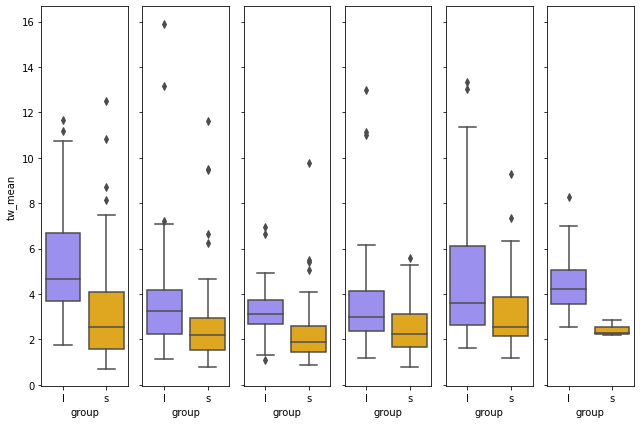

In [58]:
num_subplots = wait_df['period'].max()+1
fig, axs = plt.subplots(1, num_subplots, figsize=(num_subplots*1.5, 6), sharey=True)
for p, period_data in wait_df.groupby('period'):
    sns.boxplot(data=period_data,
                x="group", 
                y="tw_mean", 
                palette=custom_palette,
                ax=axs.flat[p])
    if p != 0:
        axs.flat[p].set_ylabel("")

plt.tight_layout()
plt.savefig(f'{figure_folder}/tw_box_by_period.png', bbox_inches='tight')

In [59]:
tw_stats_by_period = generate_p_val_df(wait_df, "period")
tw_stats_by_period[tw_stats_by_period['p_val_t'] < 0.05]

,num,s_tw,l_tw,p_val_t,p_val_u
0,0,3.317279,5.393814,0.000002,7.906828e-08
1,1,2.622662,3.742507,0.004916,1.753260e-05
2,2,2.234131,3.210818,0.000038,2.325913e-08
3,3,2.540921,3.626717,0.006824,3.361835e-03
5,5,2.433902,4.618729,0.042808,8.791209e-03


In [60]:
tw_stats_by_period

,num,s_tw,l_tw,p_val_t,p_val_u
0,0,3.317279,5.393814,0.000002,7.906828e-08
1,1,2.622662,3.742507,0.004916,1.753260e-05
2,2,2.234131,3.210818,0.000038,2.325913e-08
3,3,2.540921,3.626717,0.006824,3.361835e-03
4,4,3.332923,4.822188,0.050107,4.289241e-02
5,5,2.433902,4.618729,0.042808,8.791209e-03


## plots to be figured out

IndexError: index 3 is out of bounds for axis 0 with size 3

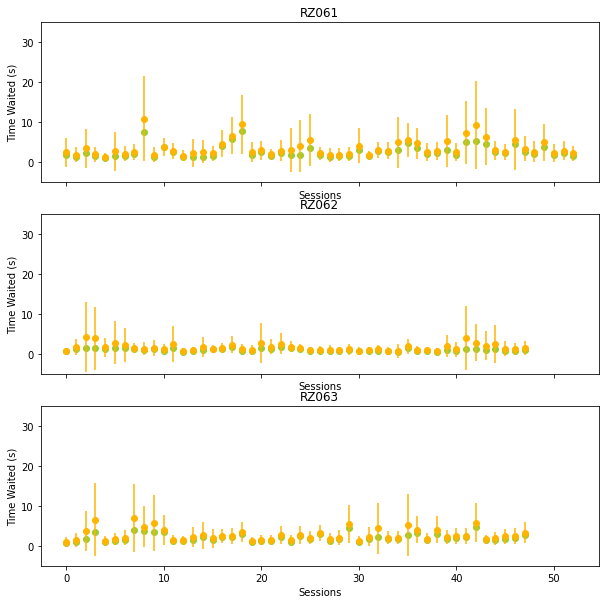

In [61]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean, session_mouse.tw_stdev, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[2].axis('off')
        axs.flat[3].axis('off')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean_g, session_mouse.tw_stdev_g, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median_g, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[2].axis('off')
        # axs.set_ylim(0, 35)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_good_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
def calculate_subplot_row_col(session_mouse, plots_per_row):
    days_trained = len(session_mouse)
    num_rows = (days_trained - 1) // plots_per_row + 1
    num_cols = min(days_trained, plots_per_row)
    return num_rows, num_cols

In [ ]:
for mouse in mouse_list:
    session_mouse = sessions_training.loc[sessions_training.mouse == mouse]
    num_rows, num_cols = calculate_subplot_row_col(session_mouse, 8)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21.5, 2.5 * num_rows))

    for i, (_, session_info) in enumerate(session_mouse.iterrows()):
        all_trials = utils_c5.load_data(utils_c5.generate_trials_analyzed_path(data_folder, session_info))
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="group",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_ylim([0,35])
        ax.set_title(f'Session {i}')
        ax.legend().remove()
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)
    plt.close()

# Stitched all sessions all mice per day

In [ ]:
stitched_folder = os.path.join(data_dir, cohort, exp, 'stitched')
stitched_figure_folder = os.path.join(data_dir, cohort, exp, 'figures')
print(data_folder)
print(figure_folder)

In [ ]:
stitched_log = utils.load_session_log(stitched_folder, f'sessions_training_stitched_{exp}.csv')

In [ ]:
def generate_events_processed_stitched_path(data_folder, session_info):
    filename = f'events_processed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, f"{session_info.date}", filename)

In [ ]:
def generate_trials_analyzed_stitched_path(data_folder, session_info):
    filename = f'trials_analyzed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, session_info.date, filename)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_cdf.png', bbox_inches='tight', dpi=300)

In [ ]:
def select_non_accident_trials(all_trials):
    non_accident_trials = all_trials[all_trials['time_waited'] > 0.5]
    return non_accident_trials

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_cdf.png', bbox_inches='tight', dpi=300)